Prediction of the close price of the day

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [59]:
df = pd.read_csv("/content/stocks.csv")

In [60]:
df.sample(20)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
49,AAPL,2023-04-19,165.800003,168.160004,165.539993,167.630005,167.630005,47720200
67,MSFT,2023-02-14,272.670013,274.970001,269.279999,272.170013,271.490021,37047900
12,AAPL,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
50,AAPL,2023-04-20,166.089996,167.869995,165.559998,166.649994,166.649994,52456400
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
149,NFLX,2023-03-15,292.510010,306.309998,292.279999,303.790009,303.790009,9215300
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
240,GOOG,2023-04-26,105.559998,107.019997,103.269997,104.449997,104.449997,37068200
171,NFLX,2023-04-17,338.000000,338.390015,327.500000,332.720001,332.720001,6136000
43,AAPL,2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200


In [61]:
df.shape

(248, 8)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [8]:
df.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


Ticker

This column represents the stock symbol (e.g., AAPL).

Since the dataset contains data for only one stock, this column has the same value throughout and does not provide any useful information for prediction.

Date

The Date column is in string format and cannot be directly used for prediction.

While it may carry time-related patterns, it's more effective to extract meaningful features like day of the week, month, or trading day index instead.

Close

The Close and Adj Close columns are very similar, but Adj Close is adjusted for corporate actions like dividends and stock splits.

Therefore, we prefer Adj Close for a more accurate reflection of the stock's value, and drop Close to avoid redundancy.

In [63]:
df.drop(columns=['Ticker'], axis=1, inplace=True)

In [64]:
df.drop(columns=['Date'], axis=1, inplace=True)

In [65]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [15]:
df.corr()

,Open,High,Low,Adj Close,Volume
Open,1.000000,0.999626,0.999650,0.999173,-0.547741
High,0.999626,1.000000,0.999654,0.999640,-0.546175
Low,0.999650,0.999654,1.000000,0.999661,-0.544590
Adj Close,0.999173,0.999640,0.999661,1.000000,-0.544370
Volume,-0.547741,-0.546175,-0.544590,-0.544370,1.000000


EDA

Univariate

<Axes: xlabel='Open', ylabel='Count'>

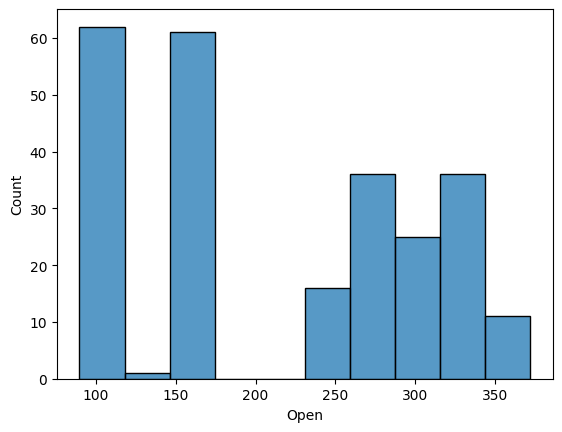

In [17]:
sns.histplot(data=df, x='Open',bins=10)

<Axes: ylabel='Volume'>

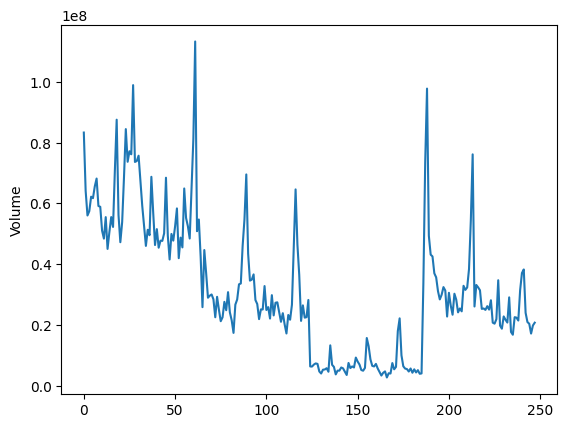

In [44]:
sns.lineplot(df['Volume'])

<ipython-input-18-daa653657926>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'])


<Axes: xlabel='High', ylabel='Density'>

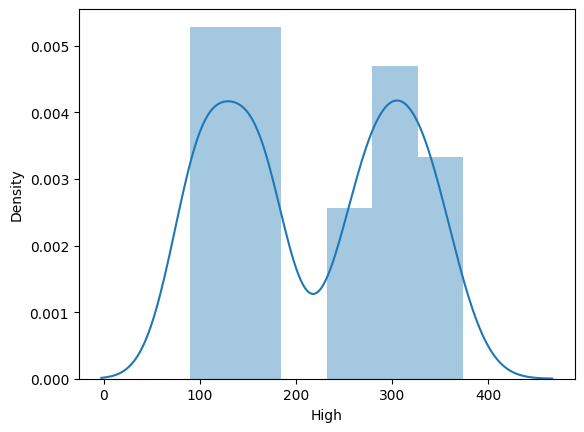

In [18]:
sns.distplot(df['High'])

<ipython-input-26-1a44b3187414>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df['Low'])


<Axes: xlabel='Low', ylabel='Density'>

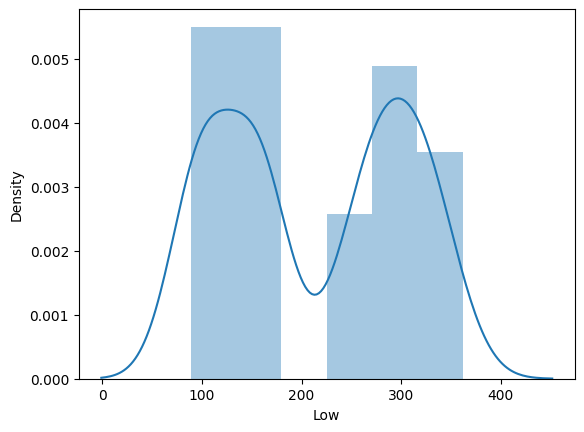

In [26]:
sns.distplot (df['Low'])

<ipython-input-27-6e3469351ab3>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Adj Close'],shade=True)


<Axes: xlabel='Adj Close', ylabel='Density'>

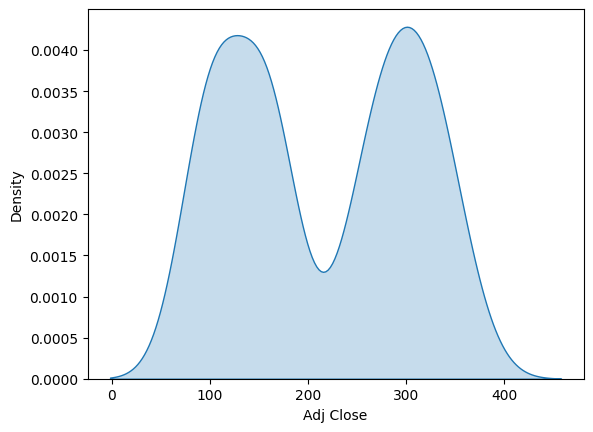

In [27]:
sns.kdeplot(df['Adj Close'],shade=True)

Checking Outliers

<Axes: ylabel='Volume'>

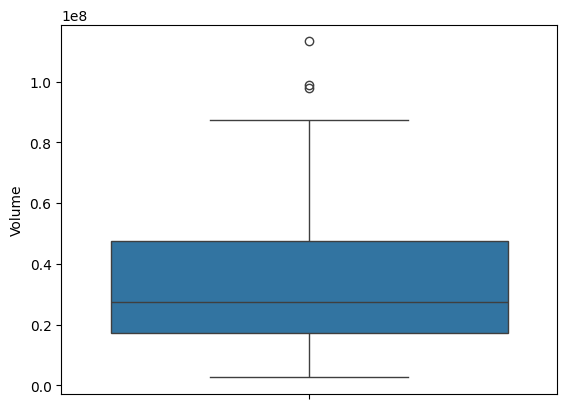

In [30]:
sns.boxplot(df['Volume'])

<Axes: ylabel='Close'>

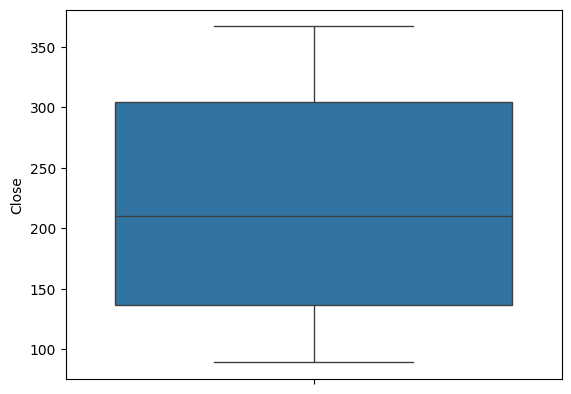

In [68]:
sns.boxplot(df['Close'])

<Axes: ylabel='Open'>

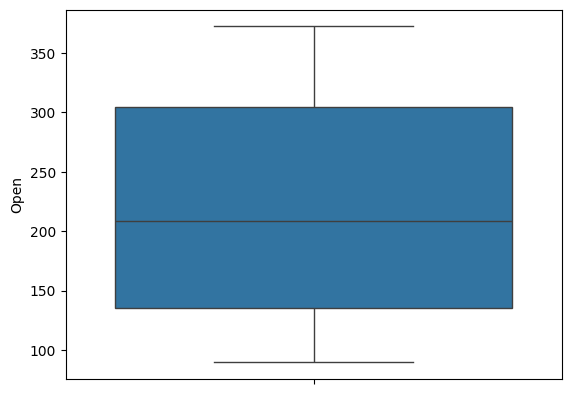

In [31]:
sns.boxplot(df['Open'])

<Axes: ylabel='High'>

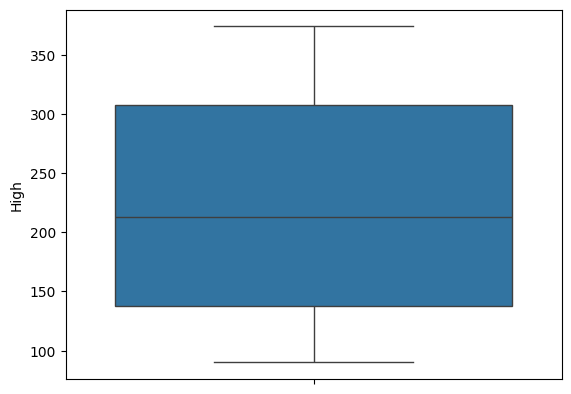

In [32]:
sns.boxplot(df['High'])

<Axes: ylabel='Adj Close'>

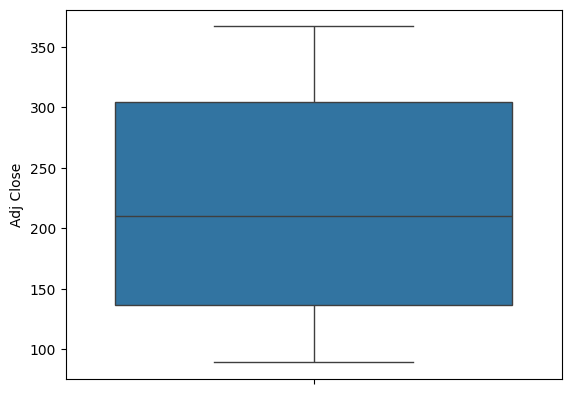

In [33]:
sns.boxplot(df['Adj Close'])

<Axes: ylabel='Low'>

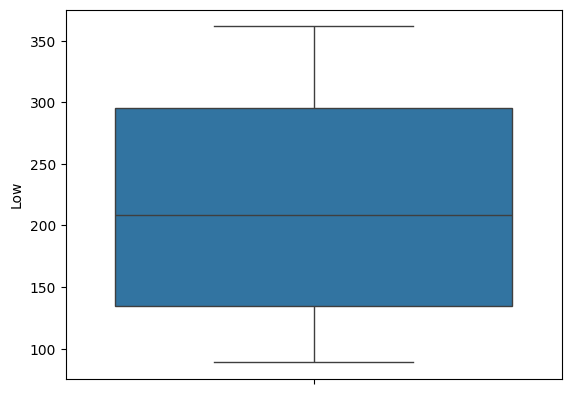

In [34]:
sns.boxplot(df['Low'])

Bivariate

<Axes: xlabel='Open', ylabel='Adj Close'>

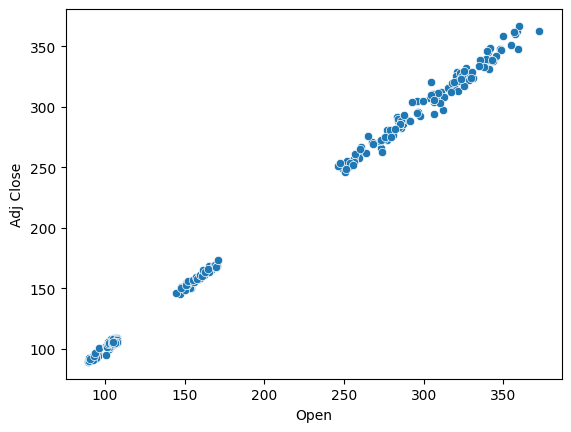

In [45]:
sns.scatterplot(data=df, x='Open', y='Adj Close')

<Axes: xlabel='High', ylabel='Adj Close'>

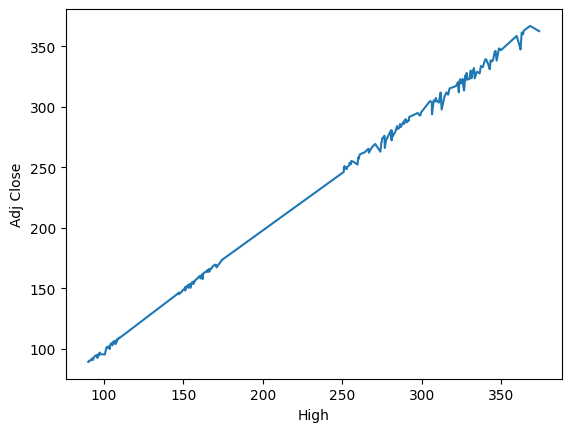

In [47]:
sns.lineplot(data=df, x='High', y='Adj Close')

<Axes: xlabel='Volume', ylabel='Adj Close'>

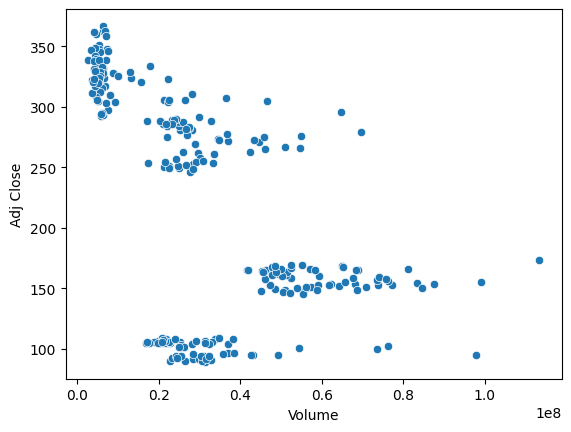

In [49]:
sns.scatterplot(data=df, x='Volume', y='Adj Close')

Finding Outliers

In [69]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [70]:
lower_bound

np.float64(-28722087.5)

In [71]:
upper_bound

np.float64(93581612.5)

In [72]:
new_df = df[(df['Volume'] > upper_bound) | (df['Volume'] < lower_bound)]
new_df

,Open,High,Low,Close,Adj Close,Volume
27,156.080002,156.740005,154.279999,155.000000,155.000000,98944600
61,170.979996,174.300003,170.759995,173.570007,173.570007,113316400
188,100.540001,100.610001,93.860001,95.459999,95.459999,97798600


Trimming

In [73]:
new_df = df[(df['Volume'] < upper_bound) & (df['Volume'] > lower_bound)]
new_df

,Open,High,Low,Close,Adj Close,Volume
0,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...
243,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [56]:
df.shape

(248, 5)

In [57]:
new_df.shape

(245, 5)

Dependent Column

In [89]:
y = new_df.iloc[:,-3]
y

,Close
0,154.649994
1,151.919998
2,150.869995
3,151.009995
4,153.850006
...,...
243,107.709999
244,105.980003
245,106.120003
246,105.209999


Independent Column

In [90]:
X = new_df.drop('Close',axis=1)
X

,Open,High,Low,Adj Close,Volume
0,150.639999,155.229996,150.639999,154.414230,83322600
1,153.880005,154.580002,151.169998,151.688400,64120100
2,153.779999,154.330002,150.419998,150.639999,56007100
3,149.460007,151.339996,149.220001,151.009995,57450700
4,150.949997,154.259995,150.919998,153.850006,62199000
...,...,...,...,...,...
243,107.720001,108.680000,107.500000,107.709999,20926300
244,107.660004,107.730003,104.500000,105.980003,20343100
245,106.220001,108.129997,105.620003,106.120003,17116300
246,106.160004,106.300003,104.699997,105.209999,19780600


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [92]:
Lr = LinearRegression()

In [93]:
Lr.fit(X_train,y_train)

LinearRegression()

In [94]:
y_pred = Lr.predict(X_test)
y_pred

array([311.76035656, 269.32914546, 106.40548142, 359.97138876,
       158.99135606, 291.61971678, 109.43494739, 273.79357368,
       106.25275617, 265.47730216, 148.93406109, 271.52597039,
       304.87226454, 162.04158554, 162.37435623, 151.03795669,
       287.20081027, 320.40838209, 106.09690112, 255.29390673,
       339.31178688, 101.29826588, 338.44411553, 152.64464068,
       305.77707988, 327.71558306, 323.69712125, 152.88429887,
       272.37129498, 147.93683003, 168.45105628, 276.41269858,
       104.61769889, 304.42217243, 317.58530833, 105.83619607,
       150.55863743, 101.10386238, 312.09435315, 147.43848914,
       295.4511982 , 270.69954933, 105.88853325, 322.56548797,
        97.09850411, 346.74204571, 153.04530416, 323.1369559 ,
       249.42202514])

In [95]:
y_test

,Close
144,311.790009
68,269.320007
233,106.419998
129,359.959991
31,158.929993
103,291.600006
232,109.459999
91,273.779999
217,106.260002
87,265.440002


In [101]:
X_test

,Open,High,Low,Adj Close,Volume
144,309.290009,311.829987,305.750000,311.790009,3479500
68,268.320007,270.730011,266.179993,269.320007,28922400
233,105.430000,106.709999,105.320000,106.419998,29043400
129,357.549988,363.750000,353.399994,359.959991,4624800
31,158.830002,161.550003,157.679993,158.929993,67622100
103,283.209991,292.079987,282.029999,291.600006,29770300
232,107.690002,109.580002,107.589996,109.459999,20745400
91,274.880005,275.000000,269.519989,273.779999,34558700
217,105.889999,107.100998,105.410004,106.260002,31385800
87,259.980011,266.480011,259.209991,265.440002,46028000


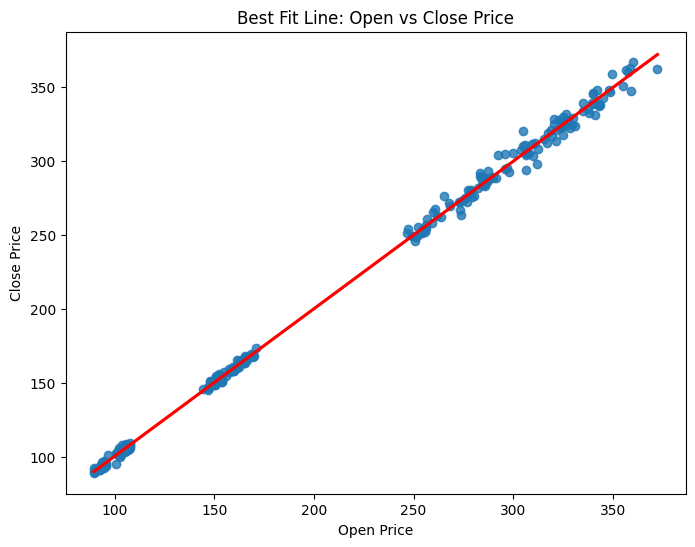

In [98]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Open', y='Close', data=df, line_kws={"color": "red"})

# Titles and labels
plt.title("Best Fit Line: Open vs Close Price")
plt.xlabel("Open Price")
plt.ylabel("Close Price")

plt.show()

In [99]:
slope = Lr.coef_
slope

array([-1.31265201e-03,  9.56600237e-03, -1.11450755e-03,  9.92927544e-01,
        1.32472967e-09])

In [100]:
intercept = Lr.intercept_
intercept

np.float64(-0.06535596676607724)

In [104]:
# yy = slope*x+interceept
yy = (slope@X_test.iloc[0])+intercept
yy

np.float64(311.7603565636732)

Accuracy

In [105]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [106]:
y_test.values

array([311.79000854, 269.32000732, 106.41999817, 359.95999146,
       158.92999268, 291.6000061 , 109.45999908, 273.77999878,
       106.26000214, 265.44000244, 148.91000366, 272.17001343,
       304.82998657, 162.02999878, 162.36000061, 151.00999451,
       287.17999268, 320.36999512, 106.12000275, 255.28999329,
       339.32998657, 101.31999969, 338.42999268, 152.58999634,
       305.79000854, 327.66000366, 323.6499939 , 152.86999512,
       272.29000854, 147.91999817, 168.41000366, 276.38000488,
       104.61000061, 304.3999939 , 317.54998779, 105.83999634,
       150.47000122, 101.06999969, 312.02999878, 147.41000366,
       295.36999512, 271.32000732, 105.91000366, 322.54998779,
        97.09999847, 346.75      , 152.99000549, 323.11999512,
       249.41999817])

In [108]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score',r2_score(y_test,y_pred))

MAE 0.052993075906729005
MSE 0.01753494329129956
RMSE 0.13241957291616507
R2 Score 0.9999977726276907


In [109]:
r2 = r2_score(y_test,y_pred)

In [110]:
X_test.shape

(49, 5)

In [111]:
1 - ((1-r2)*(49-1))/(49-5-1)

0.9999975136309106